#Project Name : US shooting data

This data is taken from kaggle website and its about the different races namely ASIAN, WHITE,BLACK,NATIVE,HISPANIC & OTHER were killed by US police. I will going to visualize this data using visualization libraries namely MATPLOTLIB, SEABORN AND PLOTLY and for analyzing i will use PANDAS & NUMPY libraries of Python. This is a part of Jovian free certification course that is being conducted online on YouTube Platfom where we learn how to analyse the data do data science job using python.


## Data Preparation and Cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Upload the data

In [2]:
us_shooting_df = pd.read_csv('shootings.csv')
us_shooting_df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


Total 4895 rows and 15 columns are present in data

In [ ]:
us_shooting_df.shape

(4895, 15)

describe() gives result of only numerical columns so it returned only these two

In [ ]:
us_shooting_df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


We can see every column information like its datatype using info() method

In [ ]:
us_shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

So, there are no null values in data

In [ ]:
us_shooting_df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

dropping irrelavant columns

In [3]:
us_shooting_df.drop(['id','name','state','city'],1,inplace=True)

converting date column to dtype datetime from object

In [4]:
us_shooting_df['date'] = pd.to_datetime(us_shooting_df['date'])

extracting year from date column and creating a new column 'year'.

In [5]:
us_shooting_df['year'] = us_shooting_df['date'].dt.year

In [6]:
'''Now we will drop the date'''
us_shooting_df.drop(['date'],1,inplace=True)

In [7]:
print(us_shooting_df['body_camera'].value_counts())
print(us_shooting_df['signs_of_mental_illness'].value_counts())

False    4317
True      578
Name: body_camera, dtype: int64
False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64


In [8]:
us_shooting_df['gender'] = us_shooting_df['gender'].replace('M',1)
us_shooting_df['gender'] = us_shooting_df['gender'].replace('F',0)

us_shooting_df['body_camera'] = us_shooting_df['body_camera'].replace(True,1)
us_shooting_df['body_camera'] = us_shooting_df['body_camera'].replace(False,0)
us_shooting_df['body_camera'] = us_shooting_df['body_camera'].astype(int)

us_shooting_df['signs_of_mental_illness'] = us_shooting_df['signs_of_mental_illness'].replace(True,1)
us_shooting_df['signs_of_mental_illness'] = us_shooting_df['signs_of_mental_illness'].replace(False,0)
us_shooting_df['signs_of_mental_illness'] = us_shooting_df['signs_of_mental_illness'].astype(int)
us_shooting_df 

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,shot,gun,53.0,1,Asian,1,attack,Not fleeing,0,Guns,2015
1,shot,gun,47.0,1,White,0,attack,Not fleeing,0,Guns,2015
2,shot and Tasered,unarmed,23.0,1,Hispanic,0,other,Not fleeing,0,Unarmed,2015
3,shot,toy weapon,32.0,1,White,1,attack,Not fleeing,0,Other unusual objects,2015
4,shot,nail gun,39.0,1,Hispanic,0,attack,Not fleeing,0,Piercing objects,2015
...,...,...,...,...,...,...,...,...,...,...,...
4890,shot,Taser,27.0,1,Black,0,attack,Foot,1,Electrical devices,2020
4891,shot,gun,23.0,1,Black,0,attack,Car,0,Guns,2020
4892,shot,unarmed,25.0,0,White,0,other,Not fleeing,0,Unarmed,2020
4893,shot,gun,22.0,1,White,0,other,Other,0,Guns,2020


I have made some pivot tables to understand the data.

In [ ]:
arms_race_index = us_shooting_df.set_index(['arms_category','race'])
arms_race_index
arms_cat_race_grp = us_shooting_df.pivot_table(index=['arms_category','race'], fill_value=0)
arms_cat_race_grp

age  ...         year
arms_category         race                 ...             
Blunt instruments     Asian     38.800000  ...  2017.800000
                      Black     37.250000  ...  2017.350000
                      Hispanic  37.103931  ...  2017.300000
                      Native    44.000000  ...  2017.000000
                      White     39.384615  ...  2016.938462
Electrical devices    Black     34.777778  ...  2018.444444
                      Hispanic  29.000000  ...  2018.750000
                      Native    28.000000  ...  2017.000000
                      White     37.300000  ...  2017.100000
Explosives            Asian     38.000000  ...  2018.000000
                      Hispanic  48.000000  ...  2018.000000
                      White     41.000000  ...  2018.000000
Guns                  Asian     35.717655  ...  2017.714286
                      Black     32.139539  ...  2017.284595
                      Hispanic  33.539400  ...  2017.218750
                      Native    32.146341  ...  2017.048780
                      Other     35.743049  ...  2016.842105
                      White     41.792605  ...  2017.169072
Hand tools            Black     25.000000  ...  2015.000000
Multiple              Asian     42.333333  ...  2017.333333
                      Black     28.000000  ...  2017.363636
                      Hispanic  34.547533  ...  2018.230769
                      Other     31.000000  ...  2018.500000
                      White     35.960000  ...  2017.880000
Other unusual objects Asian     36.500000  ...  2018.000000
                      Black     33.142277  ...  2016.976744
                      Hispanic  33.152948  ...  2017.150000
                      Native    25.000000  ...  2017.000000
                      White     36.784131  ...  2016.679245
Piercing objects      Asian     20.000000  ...  2017.000000
                      Black     31.500000  ...  2017.500000
                      Hispanic  37.125000  ...  2017.500000
                      Native    39.000000  ...  2019.000000
                      Other     30.000000  ...  2015.000000
                      White     47.571429  ...  2017.000000
Sharp objects         Asian     39.387097  ...  2016.903226
                      Black     35.983740  ...  2017.294118
                      Hispanic  35.606294  ...  2017.227513
                      Native    31.368421  ...  2017.526316
                      Other     29.500000  ...  2016.785714
                      White     38.280869  ...  2017.162025
Unarmed               Asian     31.857143  ...  2018.714286
                      Black     32.393120  ...  2016.813008
                      Hispanic  31.366951  ...  2016.873016
                      Native    32.750000  ...  2016.750000
                      Other     29.000000  ...  2015.400000
                      White     33.178082  ...  2017.150685
Unknown               Asian     31.764741  ...  2016.750000
                      Black     30.473314  ...  2016.527778
                      Hispanic  31.742898  ...  2016.685393
                      Native    28.139741  ...  2017.125000
                      Other     36.200000  ...  2017.000000
                      White     37.931769  ...  2016.790000
Vehicles              Black     30.142277  ...  2018.651163
                      Hispanic  28.058824  ...  2018.647059
                      Native    25.000000  ...  2019.000000
                      Other     38.500000  ...  2018.500000
                      White     34.090273  ...  2018.810345

[58 rows x 5 columns]

In [ ]:
body_armed_pivot = us_shooting_df.pivot_table(values = ['age','signs_of_mental_illness'], index=['armed','body_camera'], fill_value=0)
body_armed_pivot.head(20)

age  signs_of_mental_illness
armed                            body_camera                                    
BB gun                           0            42.500000                 0.250000
                                 1            24.000000                 0.000000
BB gun and vehicle               0            32.000000                 0.000000
Taser                            0            35.000000                 0.000000
                                 1            33.000000                 0.400000
air conditioner                  0            41.000000                 0.000000
air pistol                       0            33.000000                 0.000000
ax                               0            43.222222                 0.500000
                                 1            33.333333                 0.666667
barstool                         0            40.000000                 1.000000
baseball bat                     0            37.230769                 0.307692
                                 1            37.333333                 0.333333
baseball bat and bottle          0            29.000000                 1.000000
baseball bat and fireplace poker 0            50.000000                 0.000000
baseball bat and knife           0            51.000000                 1.000000
baton                            0            31.000000                 0.500000
bayonet                          0            47.000000                 1.000000
bean-bag gun                     0            35.000000                 0.000000
beer bottle                      0            42.000000                 0.000000
blunt object                     0            47.800000                 0.200000

## Exploratory Analysis and Visualization

TODO

The visualization i performed below using pivot table can also be performed using seaborn but i also used the hue feaure of seaborn as gender to get more insight

                age
race               
Asian     36.561676
Black     32.549946
Hispanic  33.683847
Native    31.732281
Other     33.064957
White     39.909488


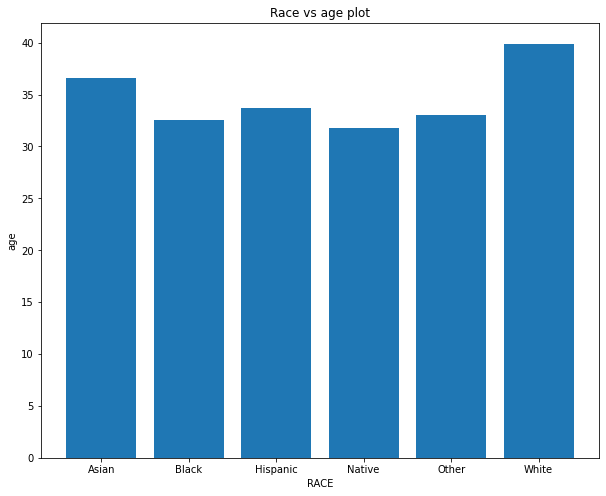

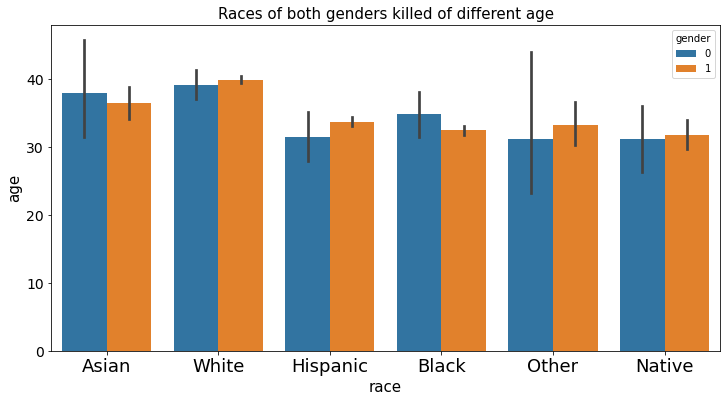

In [ ]:
us_grp_df = us_shooting_df.groupby('race')[['age']].mean()
print(us_grp_df)

plt.figure(figsize=(10,8))
plt.title('Race vs age plot')
plt.xlabel('RACE')
plt.ylabel('age')
plt.bar(us_grp_df.index, us_grp_df.age)

plt.figure(figsize=(12,6))
plt.title('Races of both genders killed of different age', fontsize=15)
plt.xlabel('RACE', fontsize=15)
plt.ylabel('AGE', fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
sns.barplot('race', 'age', hue='gender', data=us_shooting_df);

You can see the black vertical line on bars that shows the variation of thta data, and in Native race in year 2020 that black line is too big which means the survey is not properly conducted. That line should be small.

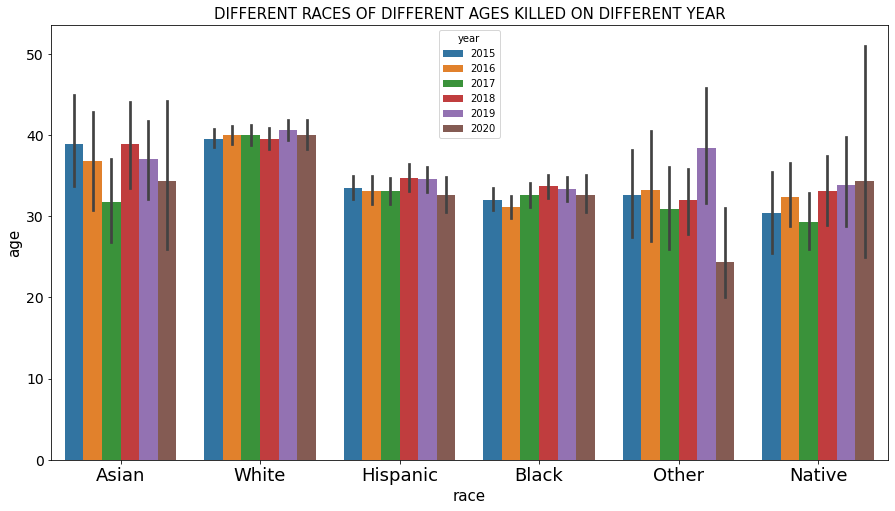

In [ ]:
plt.figure(figsize=(15,8))
plt.title('DIFFERENT RACES OF DIFFERENT AGES KILLED ON DIFFERENT YEAR',fontsize=15)
plt.xlabel('RACE', fontsize=15)
plt.ylabel('AGE', fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
sns.barplot('race', 'age', hue='year', data=us_shooting_df);

To kill native people taser was also used for the age above 30

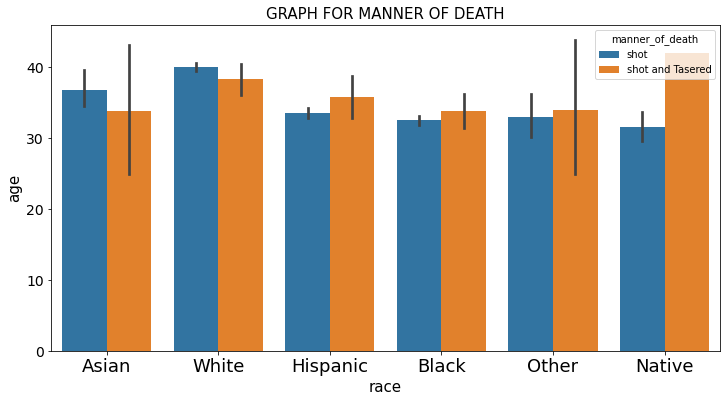

In [ ]:
plt.figure(figsize=(12,6))
plt.title('GRAPH FOR MANNER OF DEATH', fontsize=15)
plt.xlabel('RACE', fontsize=15)
plt.ylabel('AGE', fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
sns.barplot('race', 'age', hue='manner_of_death', data=us_shooting_df);

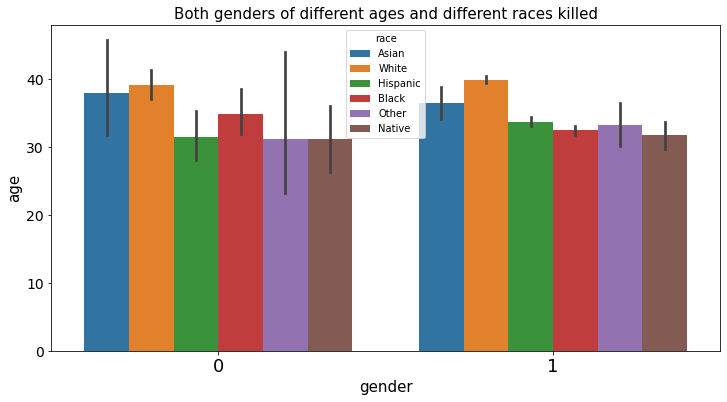

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Both genders of different ages and different races killed', fontsize=15)
plt.xlabel('GENDER', fontsize=15)
plt.ylabel('AGE', fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
sns.barplot('gender', 'age', hue='race', data=us_shooting_df);

This below graph doesn't give us enough information but we can say that more white people from age above 15 to age above 80 were killed

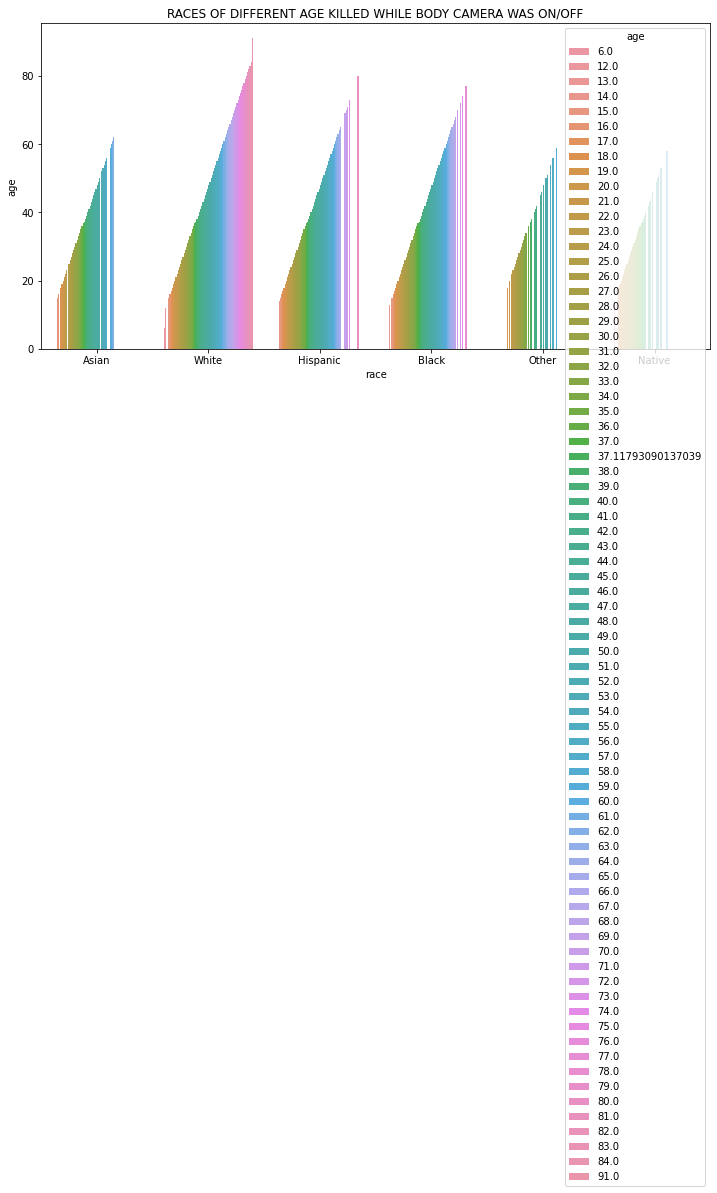

In [ ]:
plt.figure(figsize=(12,6))
plt.title('RACES OF DIFFERENT AGE KILLED WHILE BODY CAMERA WAS ON/OFF') 
sns.barplot('race', 'age', hue='age', data=us_shooting_df);

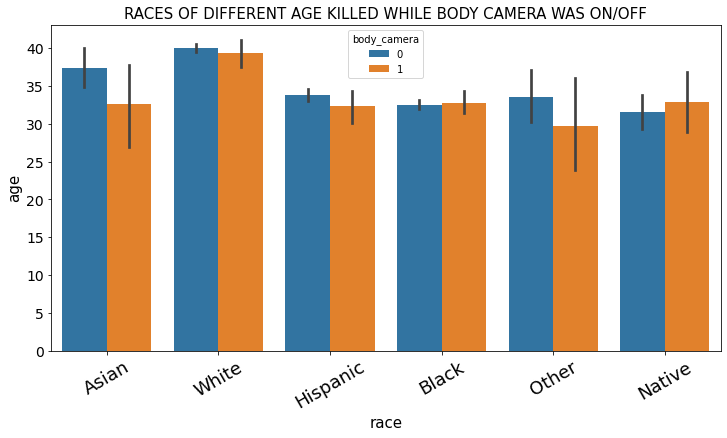

In [ ]:
plt.figure(figsize=(12,6))
plt.title('RACES OF DIFFERENT AGE KILLED WHILE BODY CAMERA WAS ON/OFF',  fontsize=15)  #0=OFF AND 1=ON
plt.xlabel('RACE', fontsize=15)
plt.ylabel('AGE', fontsize=15)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=14)
sns.barplot('race', 'age', hue='body_camera', data=us_shooting_df);

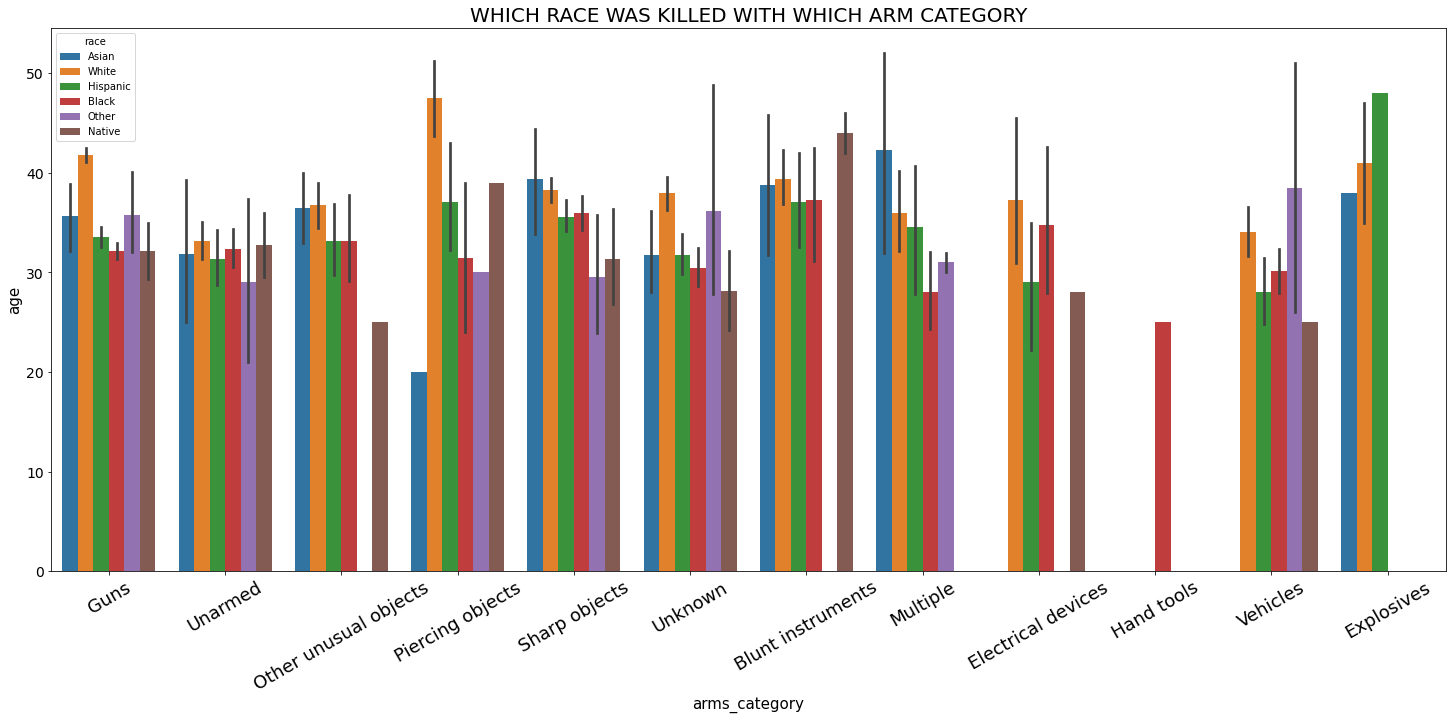

In [ ]:
plt.figure(figsize=(25,10))
plt.title('WHICH RACE WAS KILLED WITH WHICH ARM CATEGORY', fontsize=20)
plt.xlabel('ARMS_CATEGORY', fontsize=15)
plt.ylabel('AGE', fontsize=15)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=14)
sns.barplot('arms_category', 'age', hue='race', data=us_shooting_df);

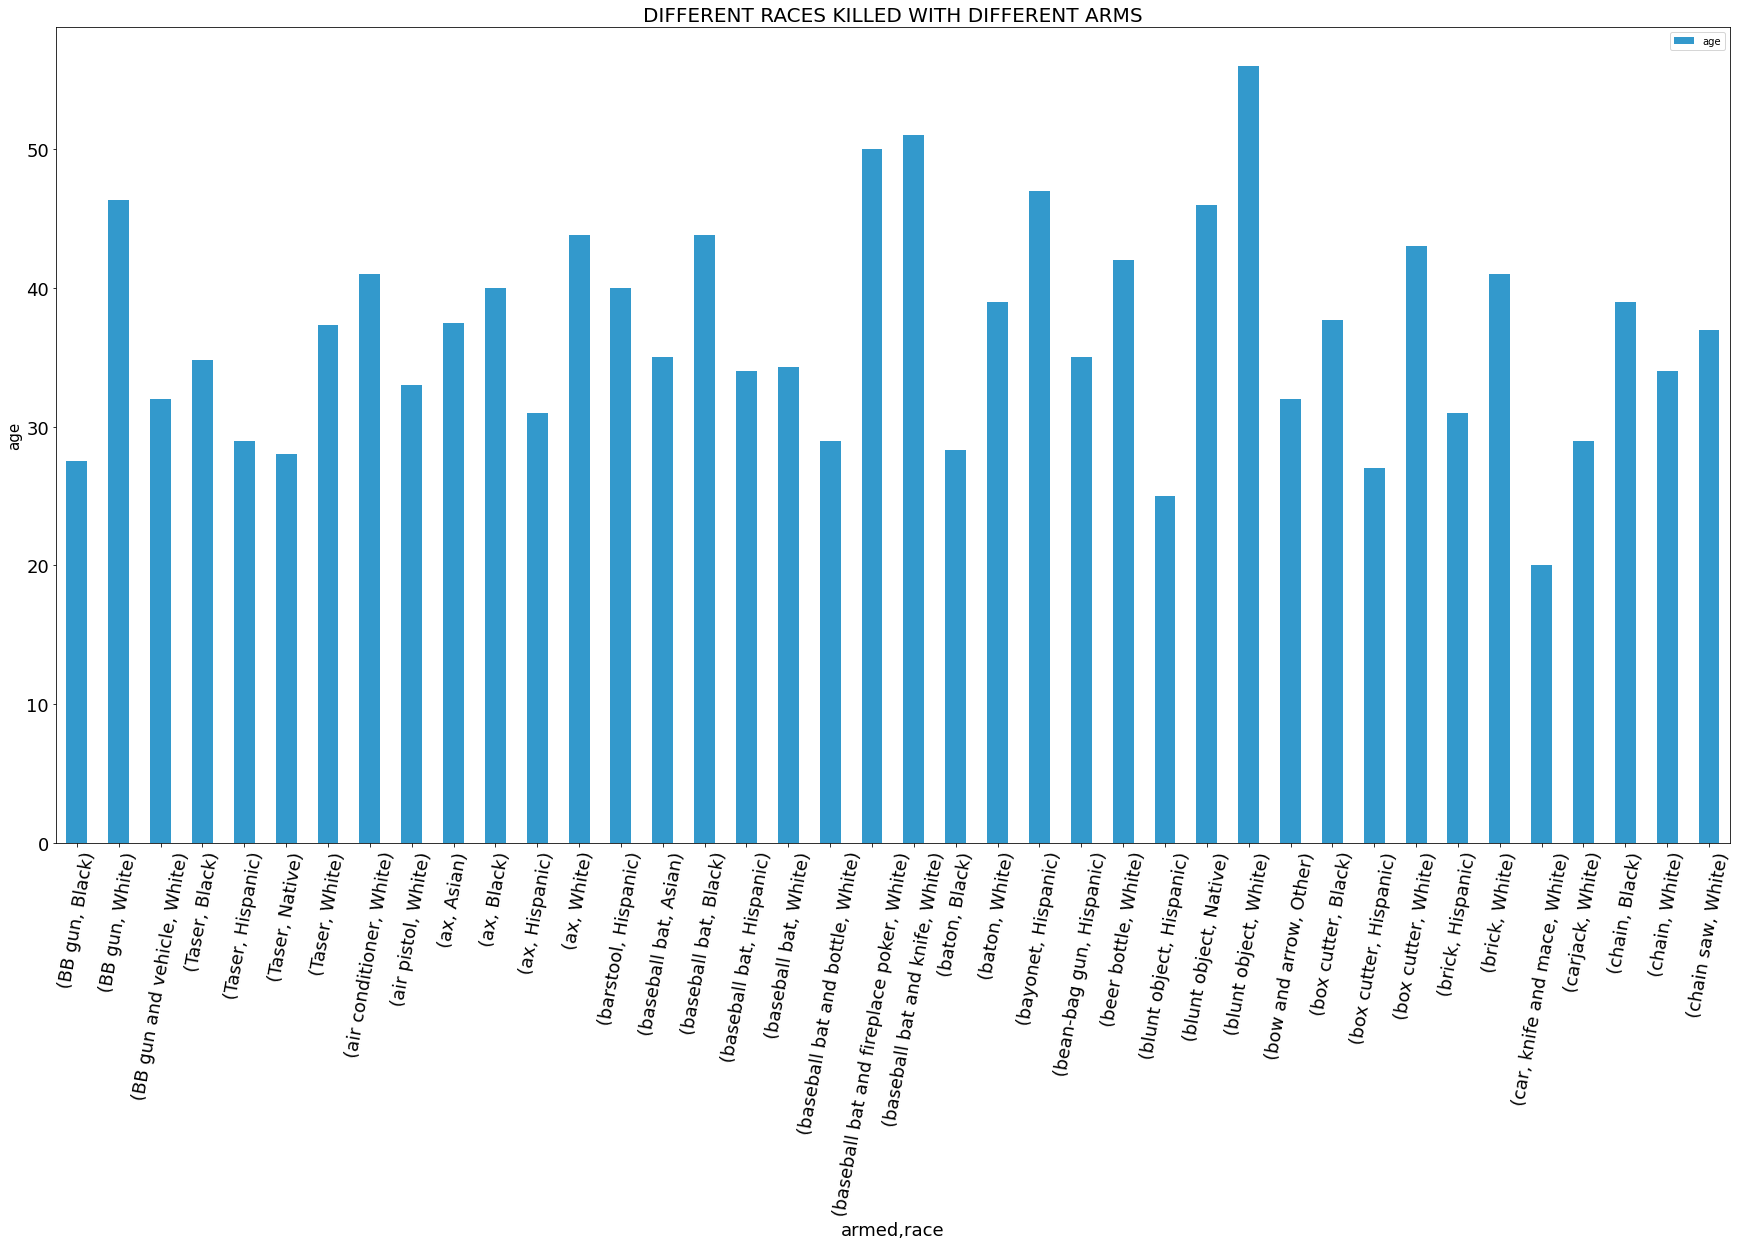

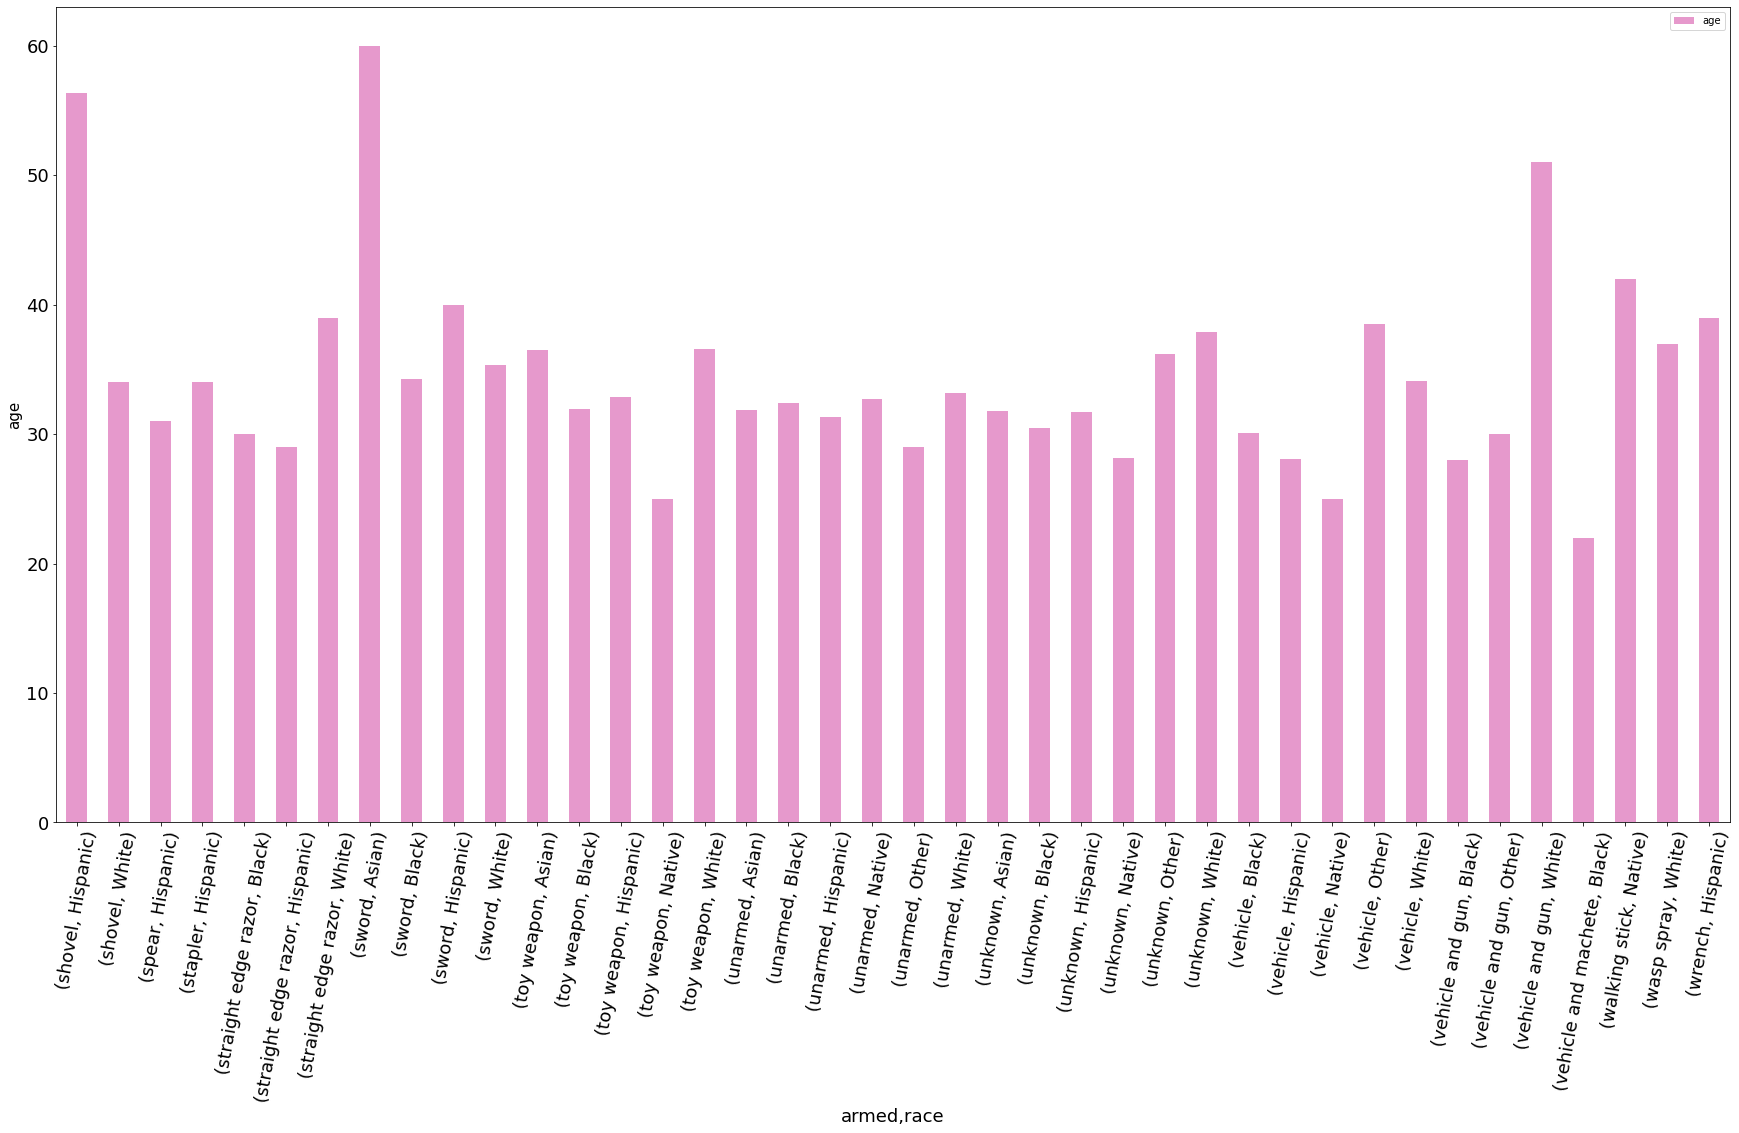

In [ ]:
us_shooting_df.pivot_table(values='age', index=['armed','race']).head(40).plot(kind='bar', figsize=(30,15), color=(0.2, 0.6, 0.8, 1.0))
plt.title('DIFFERENT RACES KILLED WITH DIFFERENT ARMS', fontsize=20)
plt.xticks(rotation=80, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('armed,race', fontsize=18)
plt.ylabel('age', fontsize=15);

us_shooting_df.pivot_table(values='age', index=['armed','race']).tail(40).plot(kind='bar', figsize=(30,15), color=(0.9, 0.6, 0.8, 1.0))
plt.xticks(rotation=80, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('armed,race', fontsize=18)
plt.ylabel('age', fontsize=15);

So, In the below pivot table and its plotted histogram we get to know the arms and its corresponding category, the most ams fall under the Blunt Instrument arms category

In [10]:
df = us_shooting_df.groupby(['arms_category','armed'])[['armed']].count()
df

armed
arms_category     armed              
Blunt instruments ax               21
                  baseball bat     16
                  baton             4
                  blunt object      5
                  brick             2
...                               ...
Sharp objects     sword            22
Unarmed           unarmed         348
Unknown           unknown         418
Vehicles          motorcycle        1
                  vehicle         120

[89 rows x 1 columns]

In [ ]:
fig = px.histogram(df, x= df.index.get_level_values('arms_category') , y= df.armed, color= df.index.get_level_values('armed'))
fig.show()

Mostly Guns were used to kill people

In [ ]:
armed_sorted = pd.DataFrame(us_shooting_df['armed'].sort_values(ascending=True).value_counts())
armed_head15 = armed_sorted.head(15)
armed_tail15 = armed_sorted.tail(15)
armed_head15

,armed
gun,2755
knife,708
unknown,418
unarmed,348
toy weapon,171
vehicle,120
machete,39
Taser,24
sword,22
ax,21


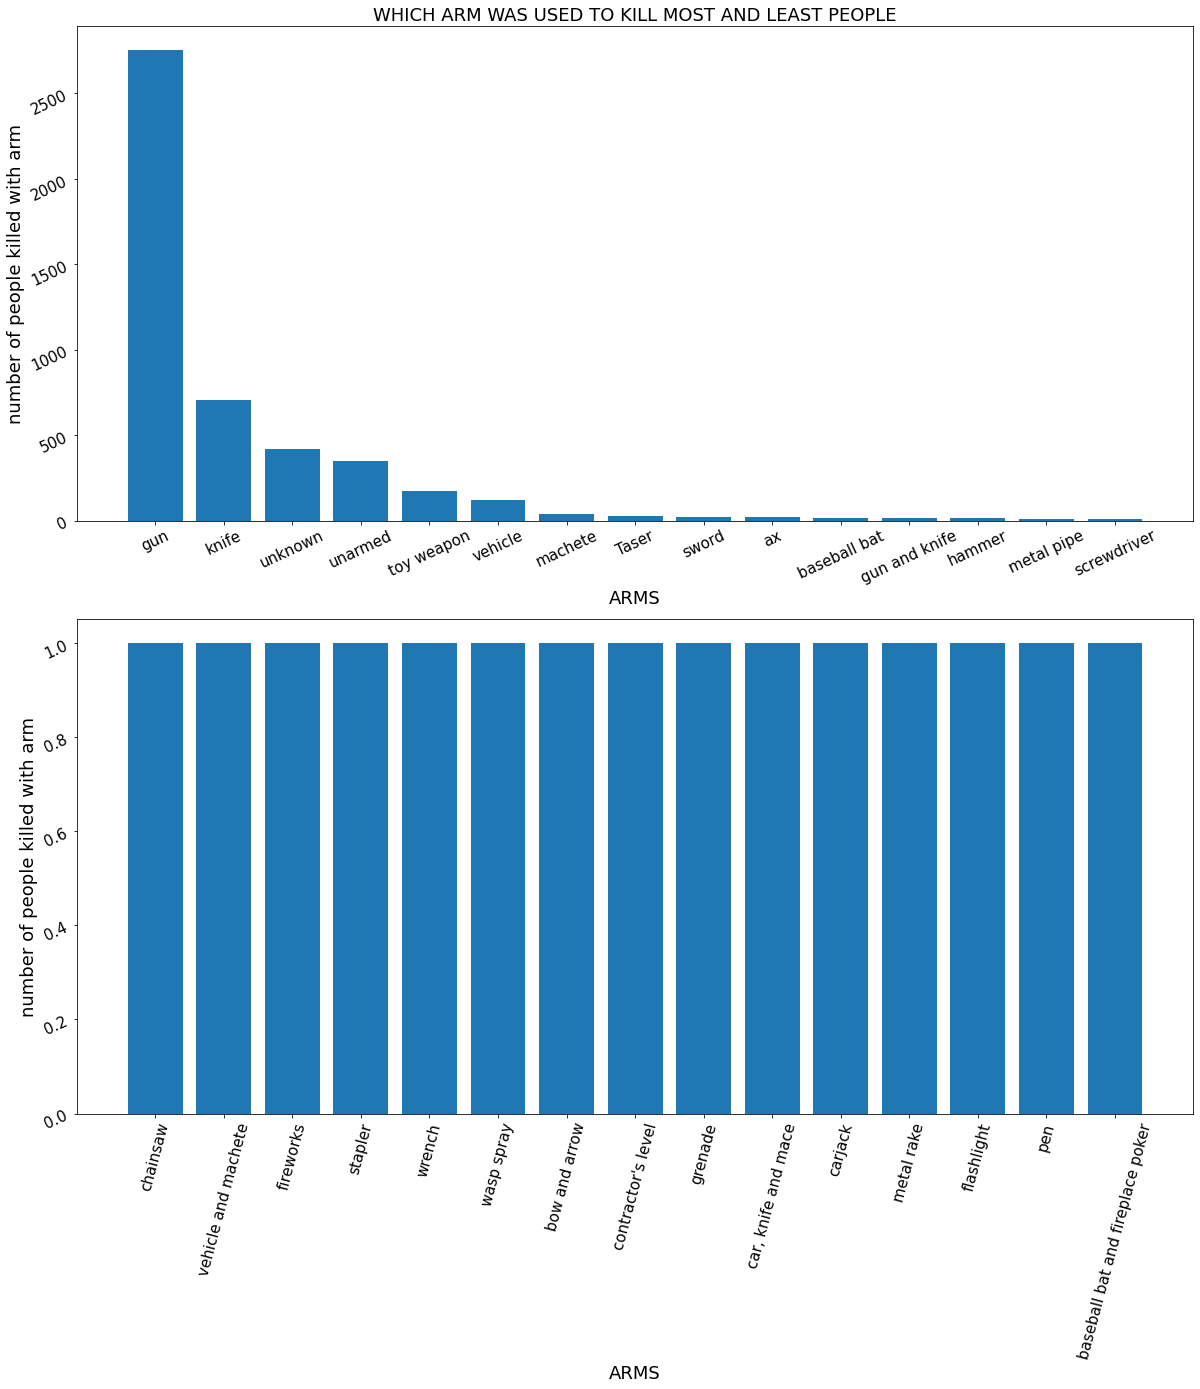

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('WHICH ARM WAS USED TO KILL MOST AND LEAST PEOPLE', fontsize=18)
plt.xlabel('ARMS', fontsize=18)
plt.xticks(rotation=25, fontsize=15)
plt.yticks(rotation=25, fontsize=15)
plt.ylabel('number of people killed with arm', fontsize=18)
plt.bar(armed_head15.index, armed_head15.armed)

plt.subplot(2,1,2)
plt.xlabel('ARMS', fontsize=18)
plt.xticks(rotation=75, fontsize=15)
plt.yticks(rotation=25, fontsize=15)
plt.ylabel('number of people killed with arm', fontsize=18)
plt.bar(armed_tail15.index, armed_tail15.armed);

More White People were killed

In [ ]:
us_race = us_shooting_df.race.value_counts()
us_race

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

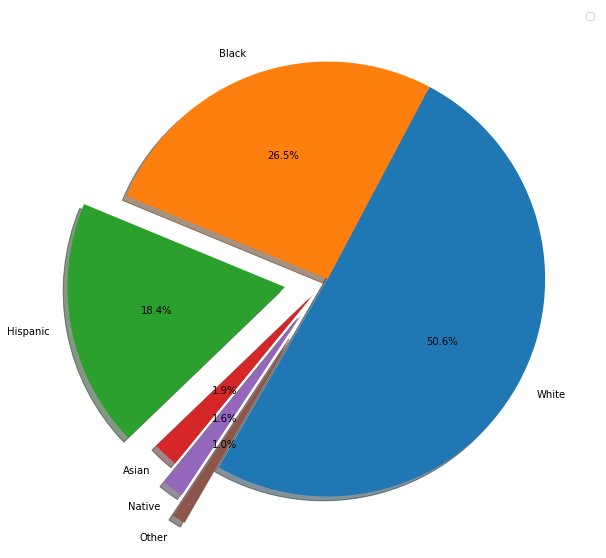

In [ ]:
plt.figure(figsize=(25,10))
plt.legend(us_race.values)
plt.pie(us_race.values, labels=us_race.index, autopct='%1.1f%%', startangle=240, explode= (0,0,0.2,0.1,0.2,0.3), shadow=True);

White people we killed mostly but in year 2020 there is decrease in the killings of all races


In [ ]:
asian_year = us_shooting_df[us_shooting_df['race']=='Asian']['year'].value_counts()
white_year = us_shooting_df[us_shooting_df['race']=='White']['year'].value_counts()
other_year = us_shooting_df[us_shooting_df['race']=='Other']['year'].value_counts()
black_year = us_shooting_df[us_shooting_df['race']=='Black']['year'].value_counts()
native_year = us_shooting_df[us_shooting_df['race']=='Native']['year'].value_counts()
hispanic_year = us_shooting_df[us_shooting_df['race']=='Hispanic']['year'].value_counts()

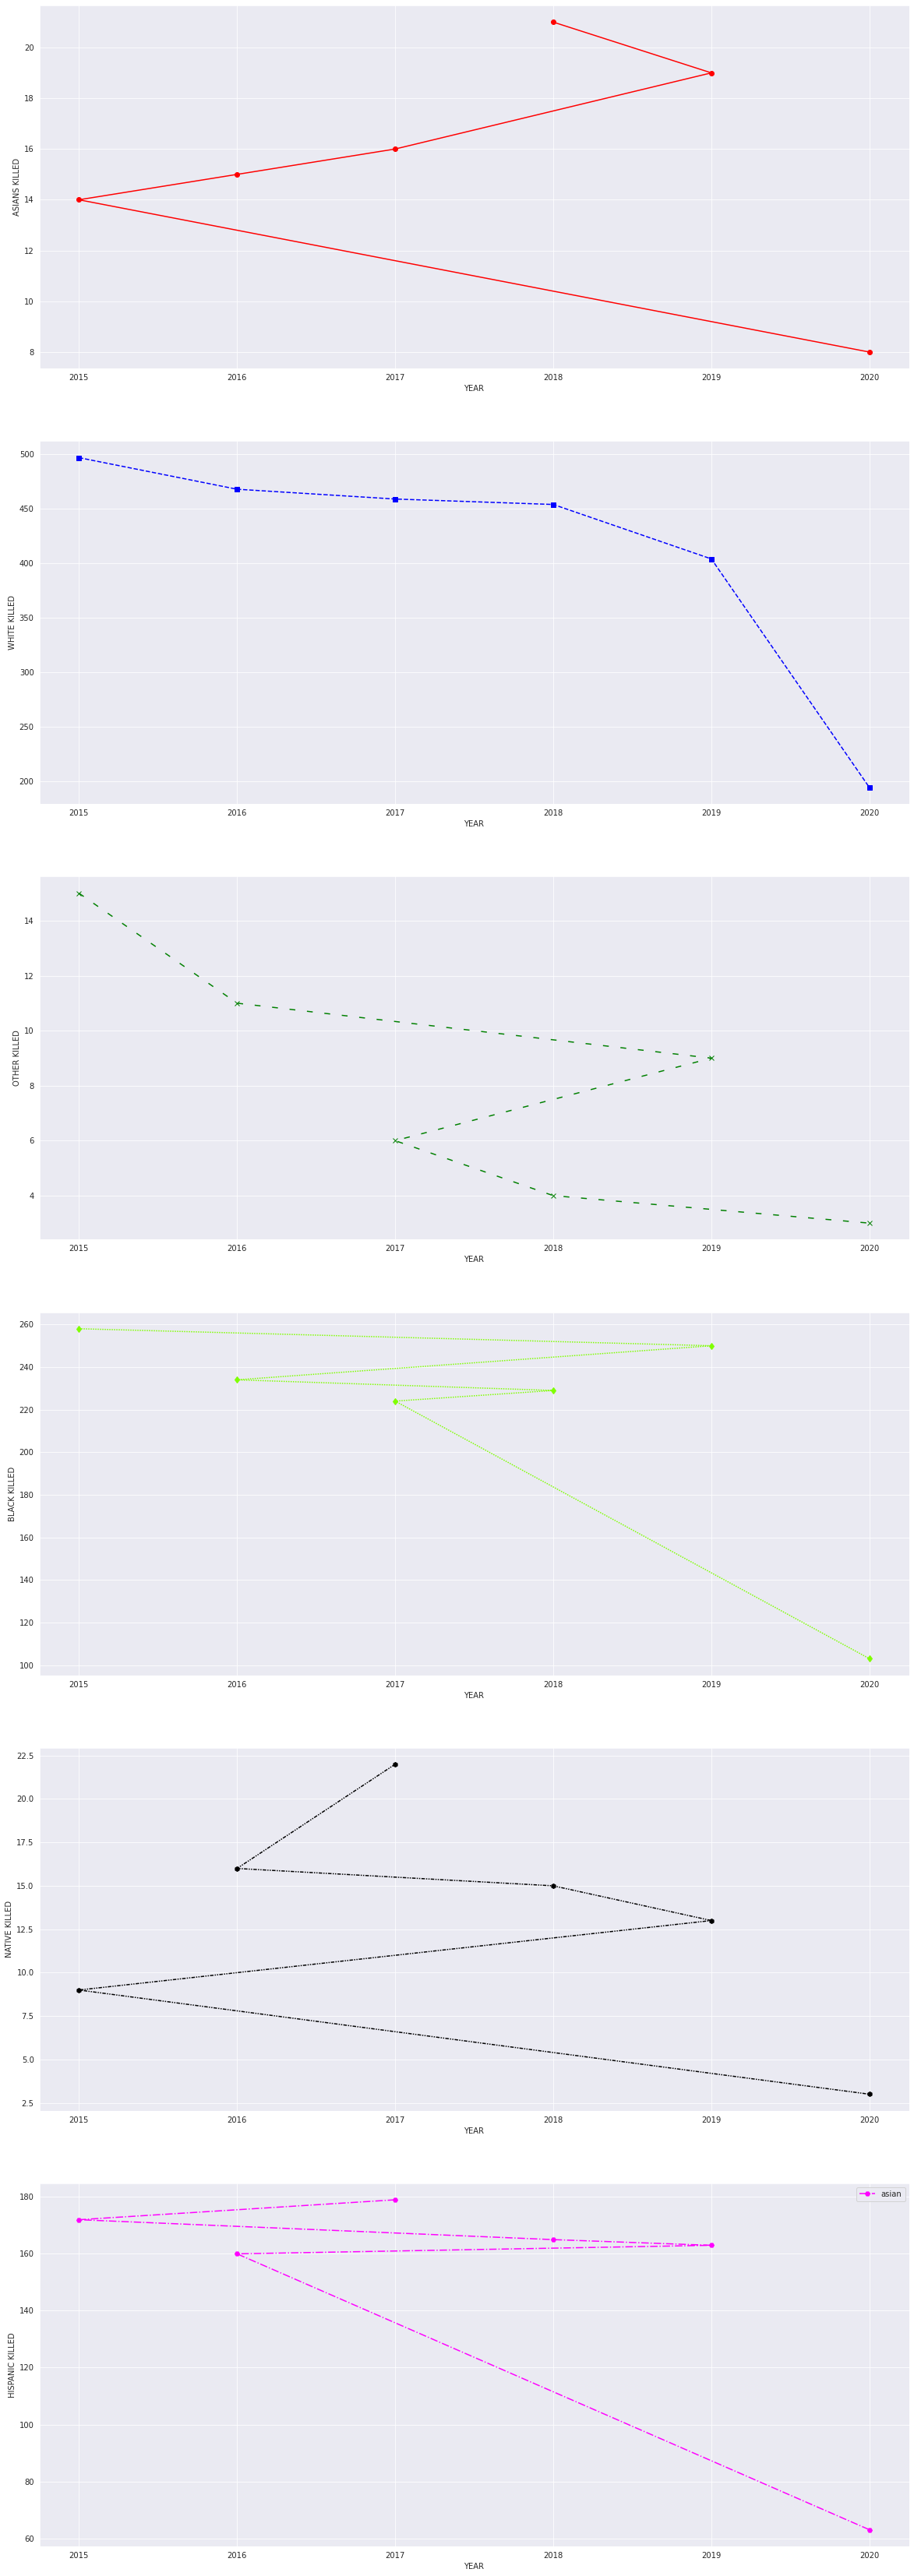

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(20,60))
plt.xlabel('year')
plt.ylabel('killed')

plt.subplot(6,1,1)
plt.xlabel('YEAR')
plt.ylabel('ASIANS KILLED')
plt.plot(asian_year,'r-o')

plt.subplot(6,1,2)
plt.xlabel('YEAR')
plt.ylabel('WHITE KILLED')
plt.plot(white_year,'b--s')

plt.subplot(6,1,3)
plt.xlabel('YEAR')
plt.ylabel('OTHER KILLED')
plt.plot(other_year, color='green', linestyle=(0, (5, 10)), marker = 'x')

plt.subplot(6,1,4)
plt.xlabel('YEAR')
plt.ylabel('BLACK KILLED')
plt.plot(black_year, color='chartreuse', linestyle=(0, (1, 1)), marker = 'd')

plt.subplot(6,1,5)
plt.xlabel('YEAR')
plt.ylabel('NATIVE KILLED')
plt.plot(native_year, color='black', linestyle=(0, (3, 1, 1, 1, 1, 1)), marker='h')

plt.subplot(6,1,6)
plt.xlabel('YEAR')
plt.ylabel('HISPANIC KILLED')
plt.plot(hispanic_year,color='magenta', linestyle='dashdot', marker='H')
plt.legend(['asian','white','other','black','native','hispanic']);

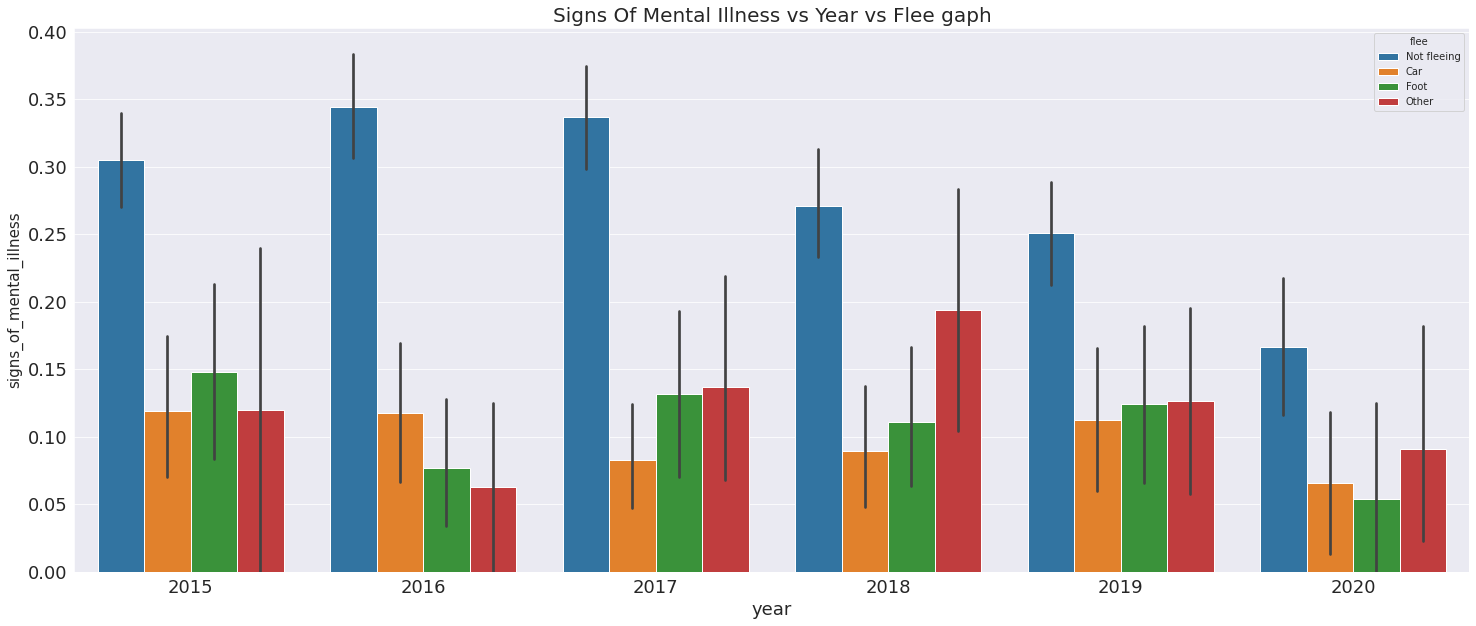

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Signs Of Mental Illness vs Year vs Flee gaph', fontsize=20)
plt.xticks( fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('armed,race', fontsize=18)
plt.ylabel('age', fontsize=15);
sns.barplot('year', 'signs_of_mental_illness', hue='flee', data=us_shooting_df);

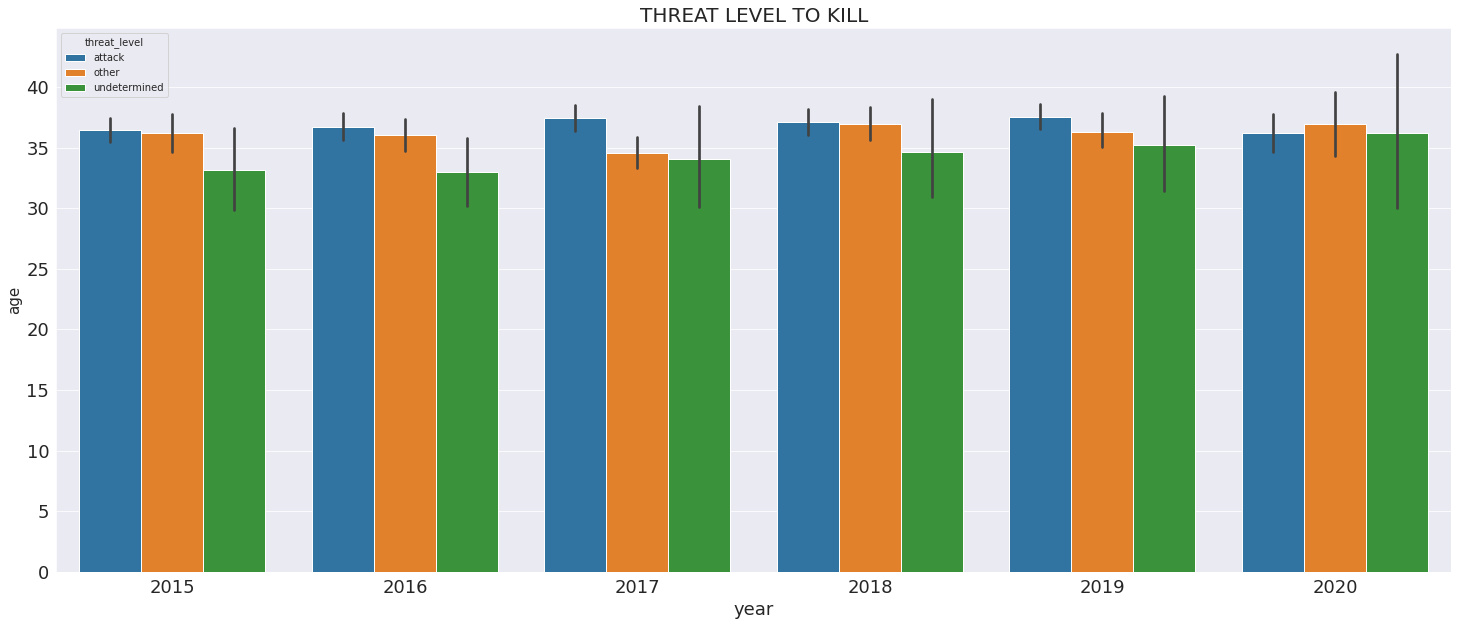

In [ ]:
plt.figure(figsize=(25,10))
plt.title('THREAT LEVEL TO KILL',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Age', fontsize=15);
sns.barplot('year', 'age', hue='threat_level', data=us_shooting_df);

## Asking and Answering Questions


<b>Q1. How many races are present in data?</b>

In [ ]:
total_races_in_data = us_shooting_df.race.nunique()
print('There are total {} unique races in data'.format(total_races_in_data))

There are total 6 unique races in data


<b>Q2. Which are those unique races?</b>

In [ ]:
unique_race_names = us_shooting_df.race.unique()
print('These are the unique races present in data : {}'.format(unique_race_names))

These are the unique races present in data : ['Asian' 'White' 'Hispanic' 'Black' 'Other' 'Native']


<b>Q3. Which race is killed most?</b>

In [ ]:
most_race_killed = us_shooting_df.race.value_counts().nlargest(1)
print('Most number of race killed is : {}'.format(most_race_killed))

Most number of race killed is : White    2476
Name: race, dtype: int64


<b>Q4. Which 5 arm was used most to kill?</b>

In [ ]:
mostly_arm_used_to_kill = us_shooting_df.armed.value_counts().nlargest(5)
print('The 5 arms used to kill are : {}'.format(mostly_arm_used_to_kill))

The 5 arms used to kill are : gun           2755
knife          708
unknown        418
unarmed        348
toy weapon     171
Name: armed, dtype: int64


<b>Q5. What is the growth/shrink in killings?</b>


The variables are declared above. For more insight refer the graph above..

In [ ]:
print('The growth/shink in killings of asian are : {}'.format(asian_year))
print("===============================================================================")
print('The growth/shink in killings of white are : {}'.format(white_year))
print("===============================================================================")
print('The growth/shink in killings of other are : {}'.format(other_year))
print("===============================================================================")
print('The growth/shink in killings of black are : {}'.format(black_year))
print("===============================================================================")
print('The growth/shink in killings of native are : {}'.format(native_year))
print("===============================================================================")
print('The growth/shink in killings of hispanic are : {}'.format(hispanic_year))

The growth/shink in killings of asian are : 2018    21
2019    19
2017    16
2016    15
2015    14
2020     8
Name: year, dtype: int64
The growth/shink in killings of white are : 2015    497
2016    468
2017    459
2018    454
2019    404
2020    194
Name: year, dtype: int64
The growth/shink in killings of other are : 2015    15
2016    11
2019     9
2017     6
2018     4
2020     3
Name: year, dtype: int64
The growth/shink in killings of black are : 2015    258
2019    250
2016    234
2018    229
2017    224
2020    103
Name: year, dtype: int64
The growth/shink in killings of native are : 2017    22
2016    16
2018    15
2019    13
2015     9
2020     3
Name: year, dtype: int64
The growth/shink in killings of hispanic are : 2017    179
2015    172
2018    165
2019    163
2016    160
2020     63
Name: year, dtype: int64


## Inferences and Conclusion


So, this is all about visualizing the data and get some insights about it. We saw that is US more white were killed from 2015 to 2020 but in year 2020 the killings were reduced fo all races, hence, the US system has worked on stopping the killings and they achieved a good result but not upto 100%. So they need to work more on it. 

## References and Future Work


In future, i need to do some more visulazations using some advance libraries which gives good plots and excellent insights too and later i will go for model applications....
Some refences to plots are:

1.   https://plotly.com/python/
2.   https://matplotlib.org/tutorials/index.html
3.   https://python-graph-gallery.com/
4.   https://seaborn.pydata.org/examples/index.html



